<h1><center>
    ECE 438 - Laboratory 3<br/>
    Number Representation and Waveform Quantization<br/>
    <br/>
    Date:<br/>
    Section:<br/>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Student Name #1 [---%]| | |
|Student Name #2 [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Understanding and implementation of uniform quantizer (45 pts)**: *Image: original and quantized images, comparison, questions. Audio: Python figures, questions*||||
|**Understanding of error analysis (35 pts)**: *Error histograms, correlation, PSNR, rate-distortion curve, questions*||||
|**Understanding of max quantizer (20 pts)**: *Histograms, PSNR, comparison with uniform quantizer*||||

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd
from helper import xcorr, lloyds

In [4]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

<h3 style="color:red;"><left>Exercise 3.3: Image Quantization</left></h3>

**1. Load the image and display it using the following sequence of commands.**

```python
image = plt.imread("fountainbw.tif")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('image')
plt.show()
```

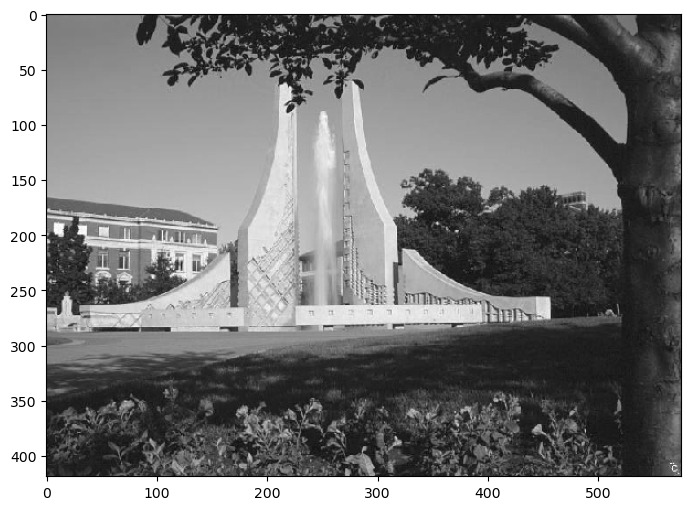

In [5]:
# insert your code here
image = plt.imread("fountainbw.tif")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('image')
plt.show()

**2. Print the data type of this image, then convert the image matrix to type `float`, and print the data type of this image again.**

* Use `image.dtype` to get the data type of `image`.

In [6]:
# insert your code here
print(image.dtype)
float_image = image.astype(float)
print(float_image.dtype)


uint8
float64


**3. Complete the function below which will uniformly quantize an input array ```X``` (either a vector or a matrix) to an ```numBits```-bit array.**

In [7]:
def Uquant(X, numBits):
    """
    Parameters
    ---
    X: the input array to be quantized
    numBits: the number of bits. The number of quantization levels will be 2^numBits.
    
    Returns
    ---
    Y: the quantized array
    """

    levels = 2**numBits
    step = (X.max() - X.min()) / levels
    Y = X.copy()

    for idx, value  in np.ndenumerate(X):
        index = int((value - X.min()) / step)

        quantized_value = X.min() + (index + 0.5) * step
        Y[idx] = quantized_value
        # replace value with quantized_value in Y
    return Y

**4. Use this function to quantize the fountain image to $7$, $6$, $5$, $4$, $3$, $2$, $1$ b/pel, and display and observe the output images. Don't forget the titles of the images.**

* To display a grayscale image `image`, use the following commands:
```python
plt.imshow(image.astype(np.uint8), cmap='gray', vmin=0, vmax=255)
plt.title("title")
plt.show()
```

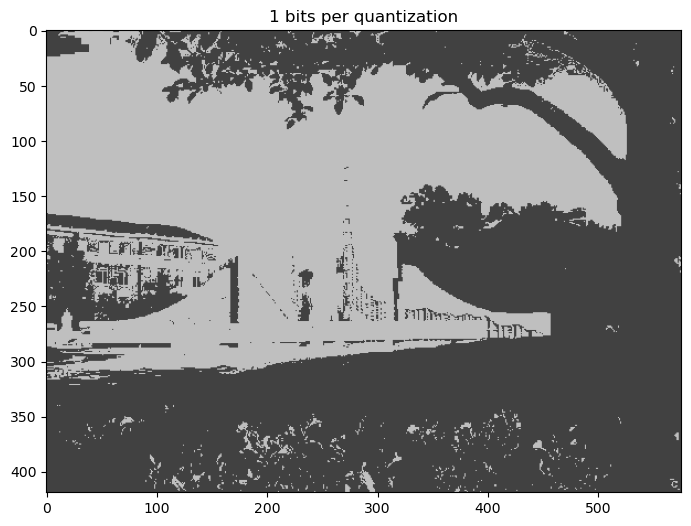

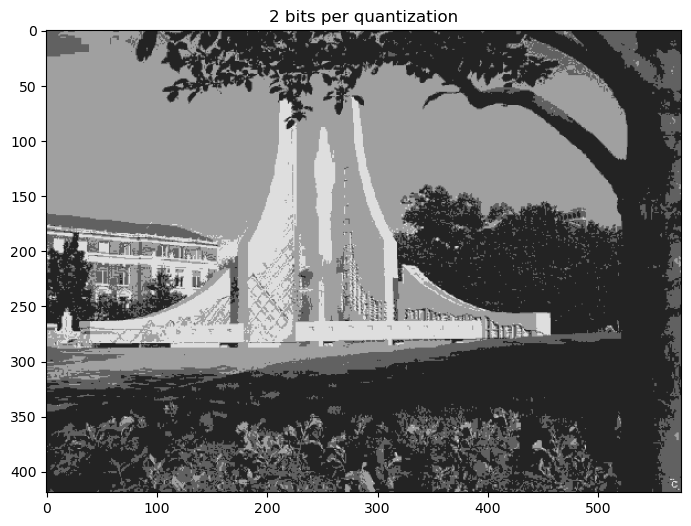

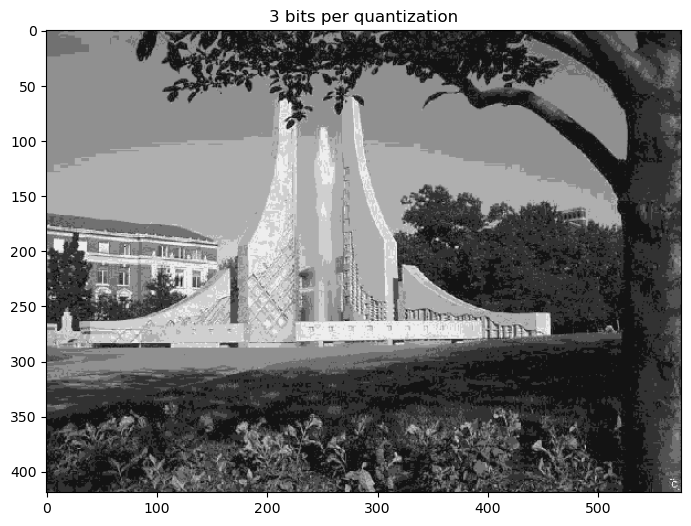

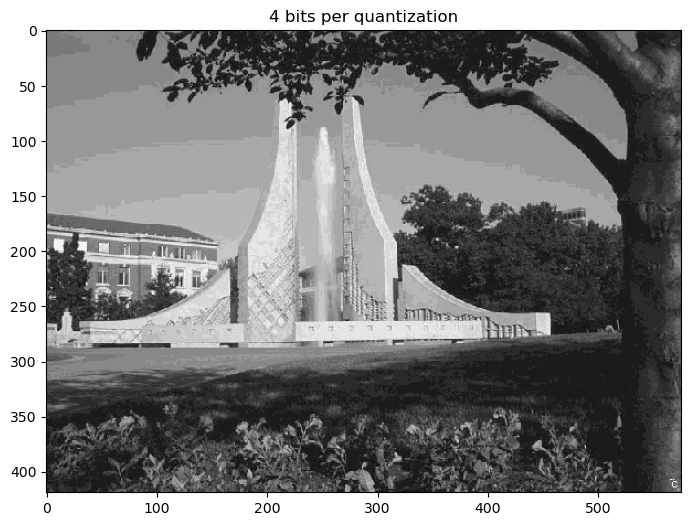

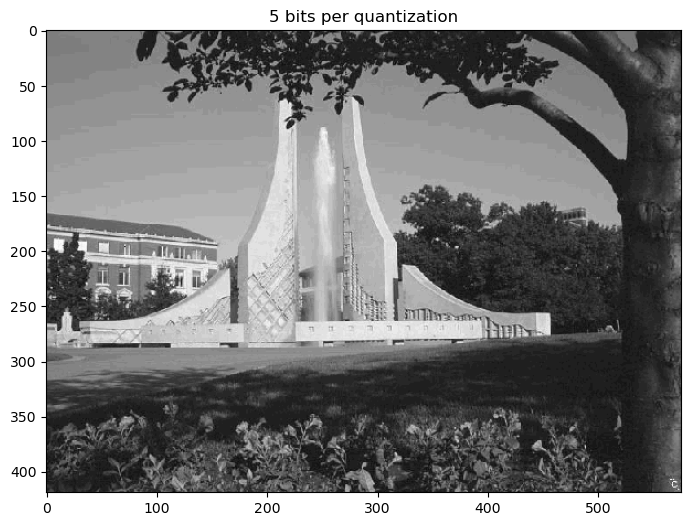

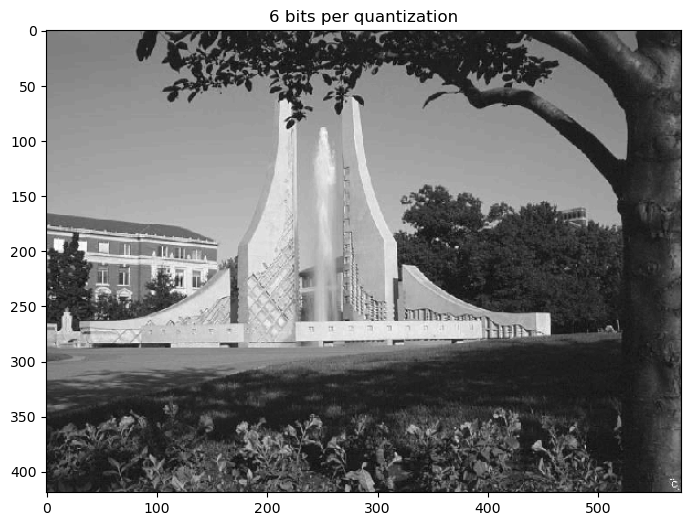

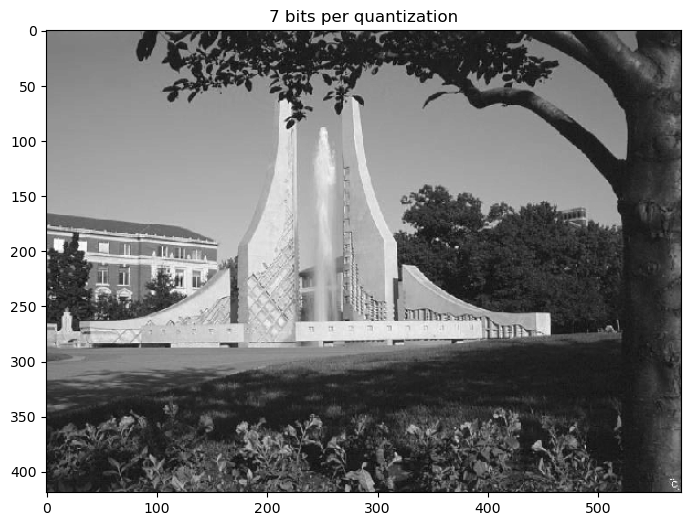

In [8]:
# insert your code here
image = plt.imread("fountainbw.tif")

for i in range(1,8):
    quantized_image = Uquant(image, i)
    plt.imshow(quantized_image.astype(np.uint8), cmap='gray', vmin=0, vmax=255)
    plt.title(f'{i} bits per quantization')
    plt.show()


**5. Describe the artifacts (errors) that appear in the image as the number of bits is lowered.**

As the number of bits is lowered, it is easier to identify different color regions in the image (black / grey / etc), where the changes aren't very gradual, but very contrasting. Other qualities like depth are also lost with lower bits.

**6. Note the number of b/pel at which the image quality noticeably deteriorates.**

In my opnion, around 4-5 b/pel, the image quality noticeably deteriorates.

**7. Compare each of four quantized images ($7$, $4$, $2$ and $1$ b/per) to the original.**

The 7 b/pel image actually seems pretty similar to the original image - without close inspection, they look the same. However, the 4/2/1 b/per images are obviously use less 'colors' to depict the image, so certain color changing regions are very obvious.

<h3 style="color:red;"><left>Exercise 3.4: Audio Quantization</left></h3>

**1. Use your function `Uquant()` to quantize each of these signals: ```speech.au``` and ```music.au``` to 7, 4, 2 and 1 bits/sample. Listen to the original and quantized signals.**

* To read an audio file:
```python
speech, fs = sf.read("speech.au")  # speech is the signal vector, and fs is the sampling frequency
```
* To play a signal
```python
ipd.Audio(speech, rate=fs)
```

In [9]:
from IPython.display import display, Audio

# insert your code here
speech, fs = sf.read('speech.au')
music, fs_m = sf.read('music.au')

display(ipd.Audio(speech, rate=fs)) 
display(ipd.Audio(music, rate=fs_m))

print("7 bit)")

speech_7 = Uquant(speech, 7)
display(ipd.Audio(speech_7, rate=fs))
music_7 = Uquant(music, 7)
display(ipd.Audio(music_7, rate=fs_m))

print("4 bit)")

speech_4 = Uquant(speech, 4)
display(ipd.Audio(speech_4, rate=fs))
music_4 = Uquant(music, 4)
display(ipd.Audio(music_4, rate=fs_m)) 

print("2 bit)")

speech_2 = Uquant(speech, 2)
display(ipd.Audio(speech_2, rate=fs))
music_2 = Uquant(music, 2)
display(ipd.Audio(music_2, rate=fs_m))

print("1 bit)")

speech_1 = Uquant(speech, 1)
display(ipd.Audio(speech_1, rate=fs))
music_1 = Uquant(music, 1)
display(ipd.Audio(music_1, rate=fs_m))

7 bit)


4 bit)


2 bit)


1 bit)


**2. For each signal, describe the change in quality as the number of b/sample is reduced.**

As the b/sample is reduced, the quality of the signal is reduced.

**3. For each signal, is there a point at which the signal quality deteriorates drastically? At what point (if any) does it become incomprehensible?**

At around 2 bits, the signal quality deteriorates drastically, and becomes incomprehensible. At 4 bits, the speech is still discernible.

**4. Which signal’s quality deteriorates faster as the number of levels decreases?**

The signal quality of the speech deteriorates faster as the levels decrease.

**5. Do you think 4 b/sample is acceptable for telephone systems? What about 2 b/sample?**

I think 4 b/sample is acceptable, but not 2b/sample.

**6. Plot the four quantized `speech` signals over the index range $[7200:7400)$. Generate a similar figure for the `music` signal, using the same indices.**

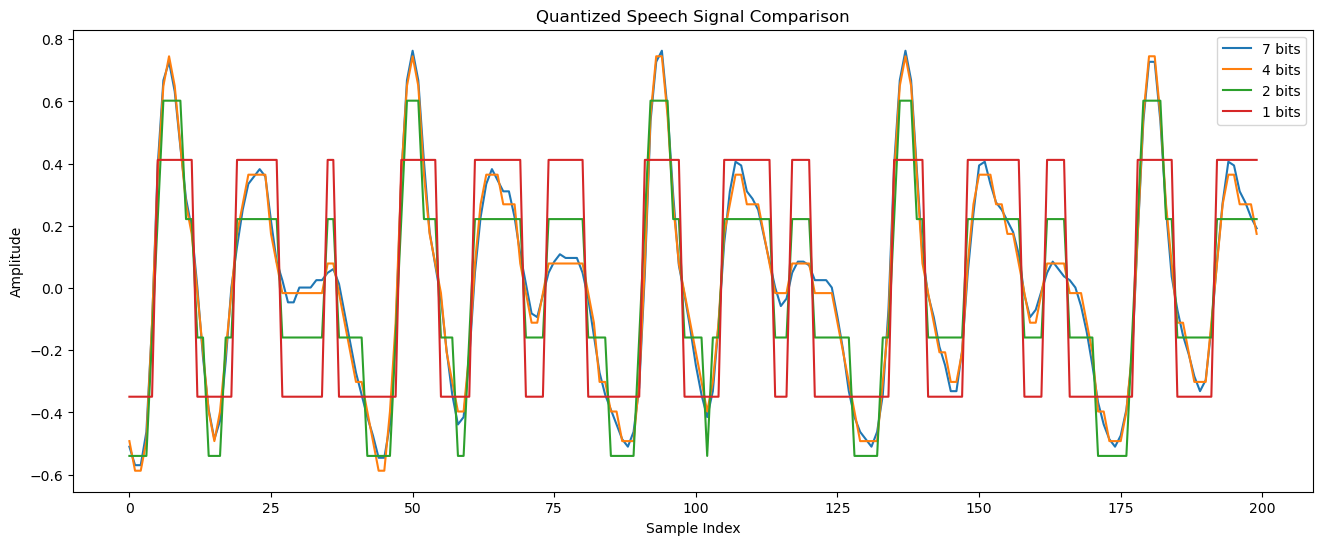

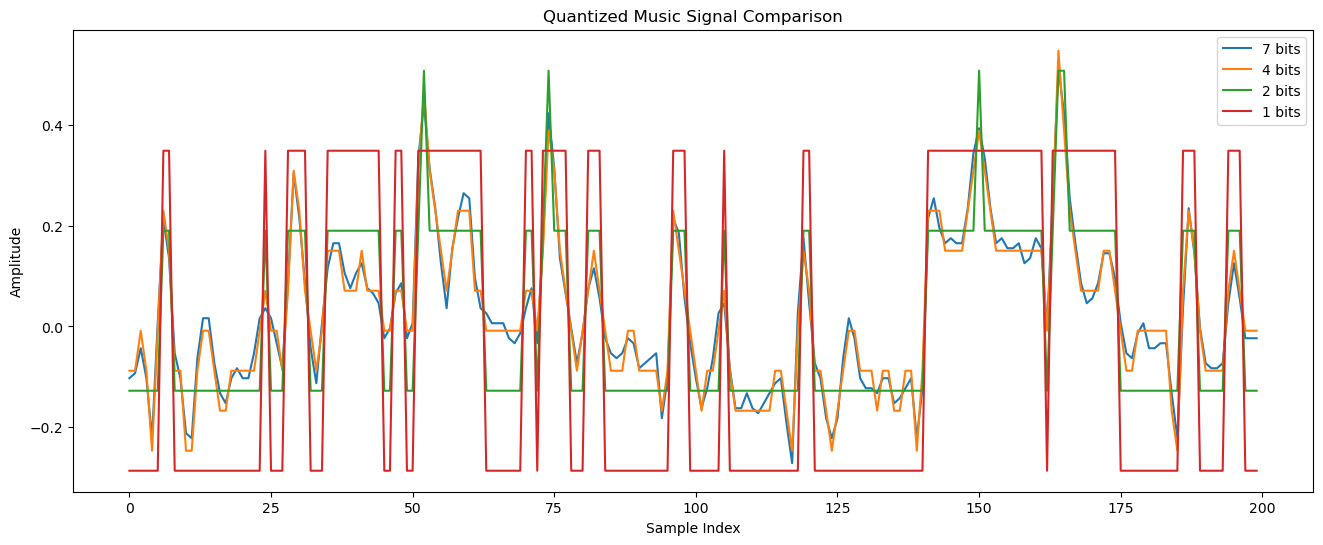

In [10]:
# insert your code here
plt.plot(speech_7[7200:7400], label='7 bits')
plt.plot(speech_4[7200:7400], label='4 bits')
plt.plot(speech_2[7200:7400], label='2 bits')
plt.plot(speech_1[7200:7400], label='1 bits')
plt.legend()
plt.title('Quantized Speech Signal Comparison')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

## plot for music
plt.plot(music_7[7200:7400], label='7 bits')
plt.plot(music_4[7200:7400], label='4 bits')
plt.plot(music_2[7200:7400], label='2 bits')
plt.plot(music_1[7200:7400], label='1 bits')
plt.legend()
plt.title('Quantized Music Signal Comparison')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()


<h3 style="color:red;"><left>Exercise 3.5. Error Analysis</left></h3>

**1. Compute the error signal for the quantized speech for $7$, $4$, $2$ and $1$ b/sample.**

In [11]:
# insert your code here
Error_7 = speech - speech_7
Error_4 = speech - speech_4
Error_2 = speech - speech_2
Error_1 = speech - speech_1


**2. Use the command [```plt.hist(E, bins=20)```](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html) to generate 20-bin histograms for each of the four error signals.**

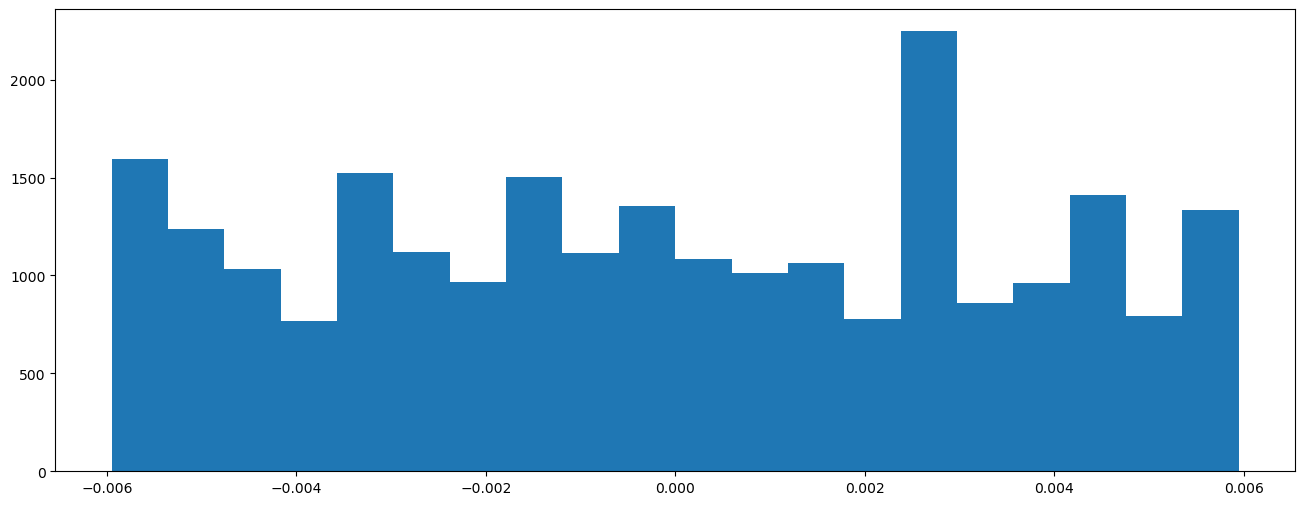

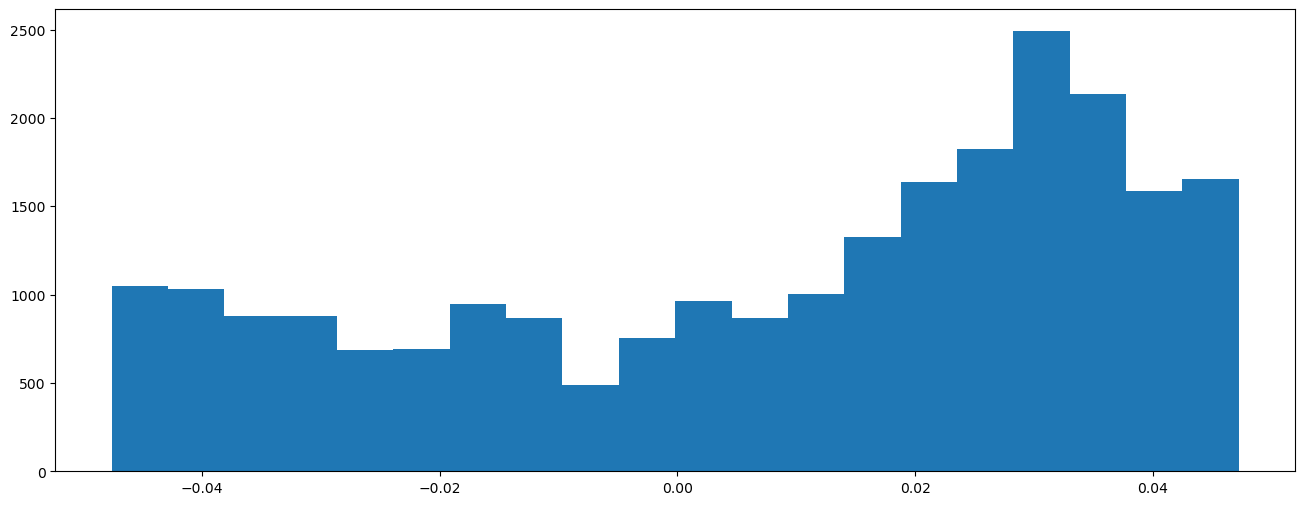

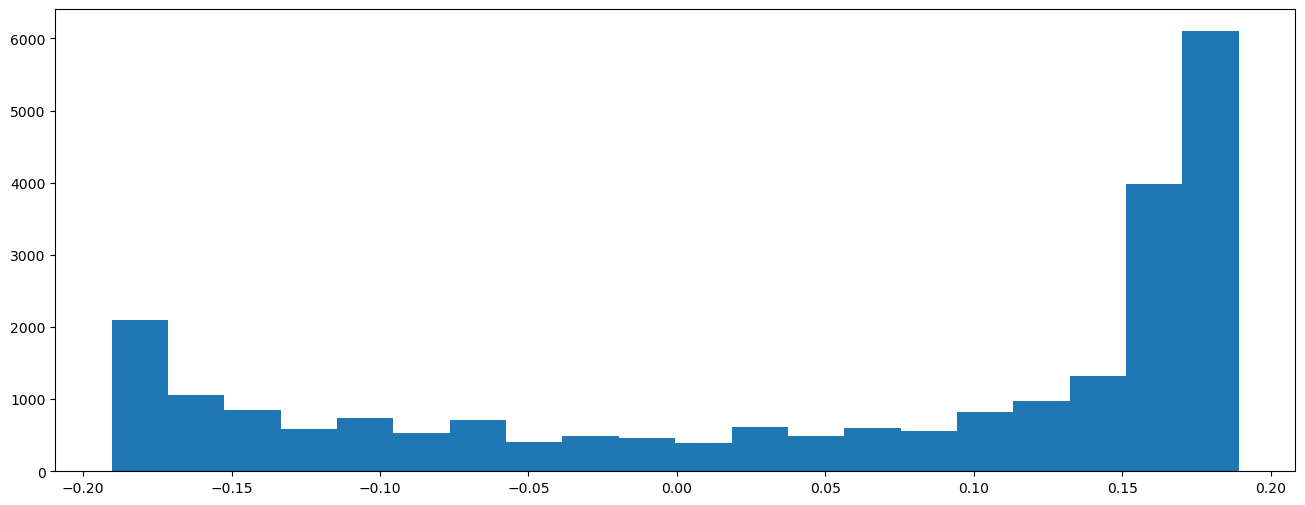

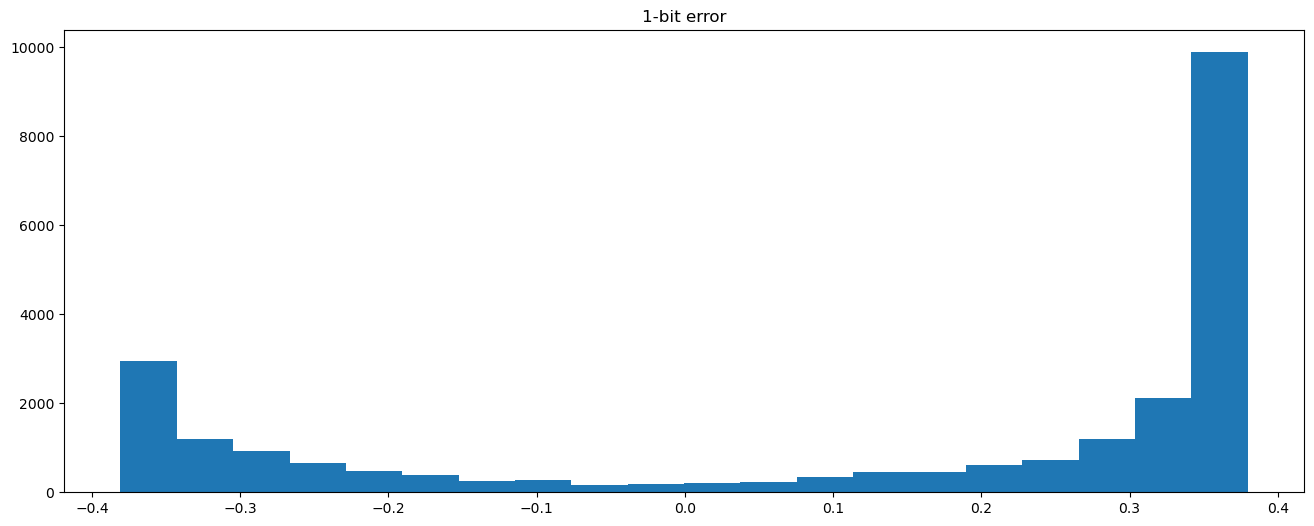

In [12]:
# insert your code here
plt.hist(Error_7, bins=20)
plt.show()
plt.hist(Error_4, bins=20)
plt.show()
plt.hist(Error_2, bins=20)
plt.show()
plt.hist(Error_1, bins=20)
plt.title("1-bit error")
plt.show()


**3. How does the number of quantization levels seem to affect the shape of the distribution?**

As the number of quantization levels increases, the error distribution becomes more uniform. With smaller numbers of levels, the distribution shape is two-tailed.

**4. Explain why the error histograms you obtain might not be uniform?**

The error histograms are not uniform because of the structure of the original audio signal. That the error was two tailed indicates that the values were not clustered around the interval edges.

**5. Compute and plot an estimate of the autocorrelation function for each of the four error signals using the following commands:**
```python
lags, r = xcorr(E, maxlags=200)
plt.plot(lags, r)
plt.show()
```
**Hint:** function ```xcorr``` is provided in the file ```helper.py```

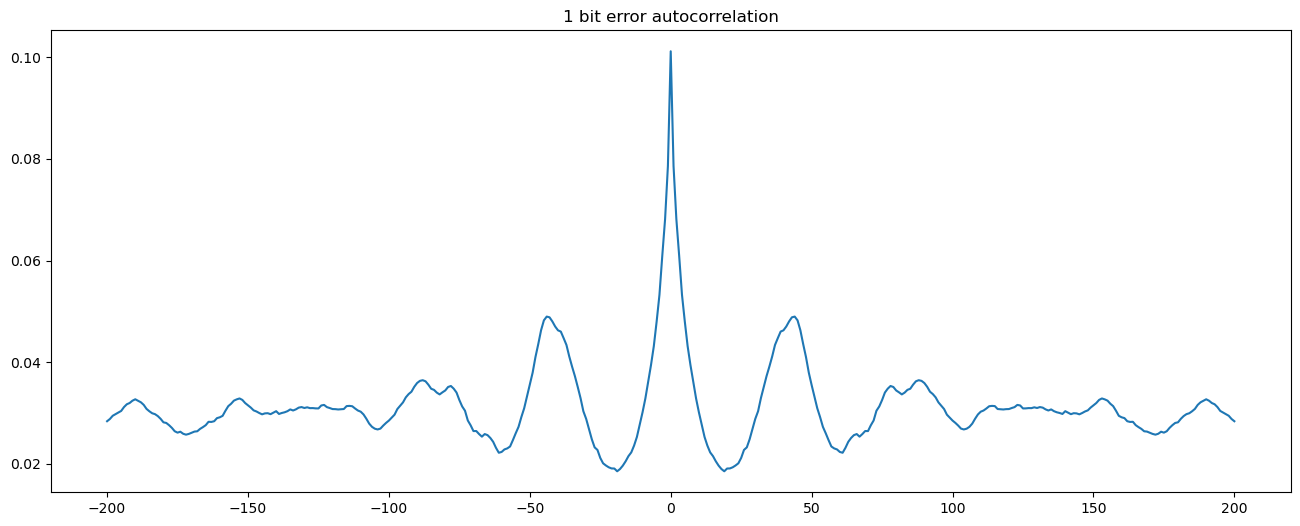

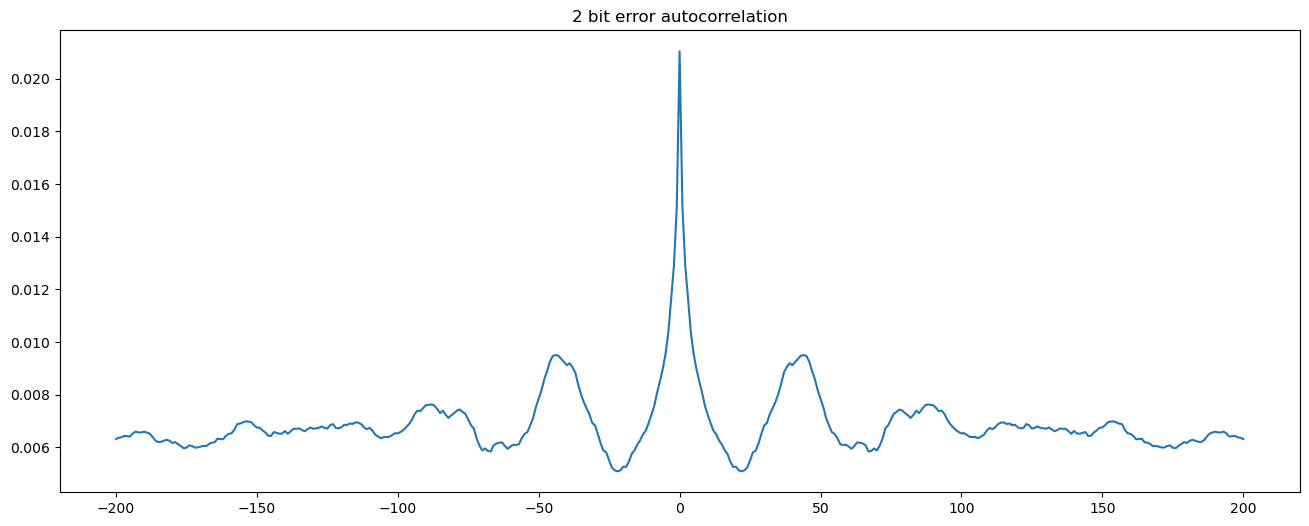

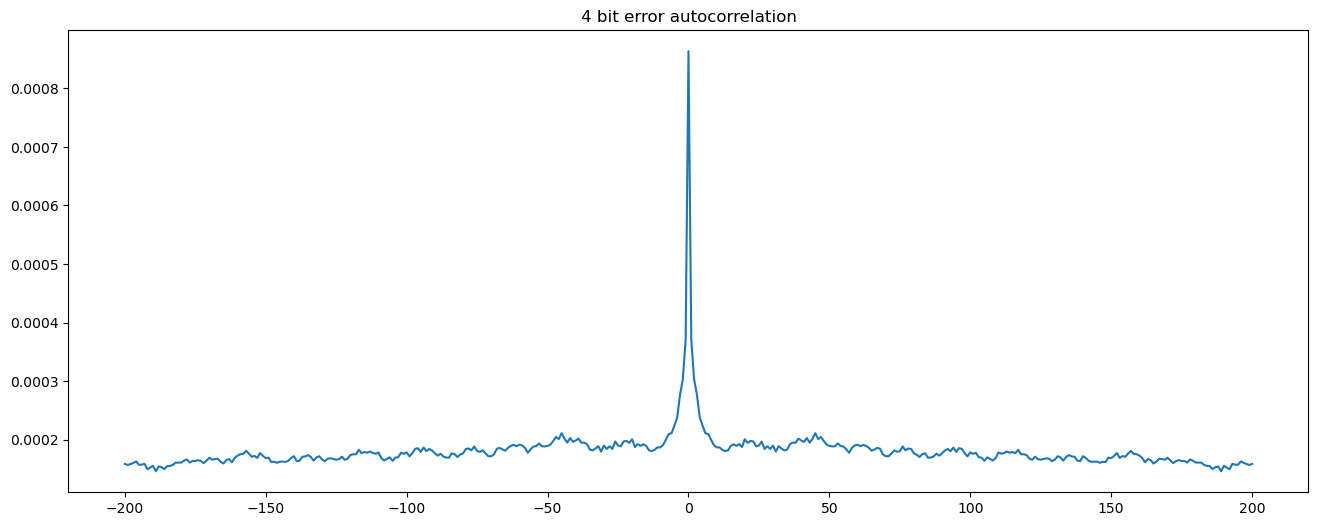

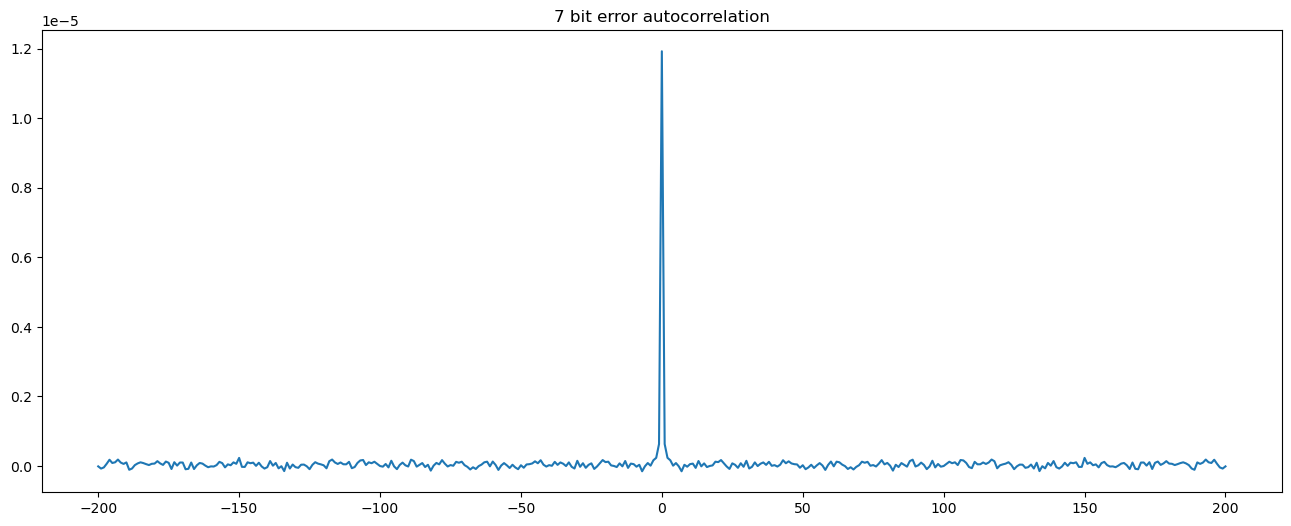

In [13]:
# insert your code here
lags, r = xcorr(Error_1, Error_1, maxlags=200)
plt.title("1 bit error autocorrelation")
plt.plot(lags, r)
plt.show()

lags, r = xcorr(Error_2, Error_2, maxlags=200)
plt.title("2 bit error autocorrelation")
plt.plot(lags, r)
plt.show()

lags, r = xcorr(Error_4, Error_4, maxlags=200)
plt.title("4 bit error autocorrelation")
plt.plot(lags, r)
plt.show()

lags, r = xcorr(Error_7, Error_7, maxlags=200)
plt.title("7 bit error autocorrelation")
plt.plot(lags, r)
plt.show()




**6. Now compute and plot an estimate of the cross-correlation function between the quantized speech $Y$ and each error signal $E$ using**
```python
lags, r = xcorr(E, Y, maxlags=200)
plt.plot(lags, r)
plt.show()
```
**Hint:** function ```xcorr``` is provided in the file ```helper.py```

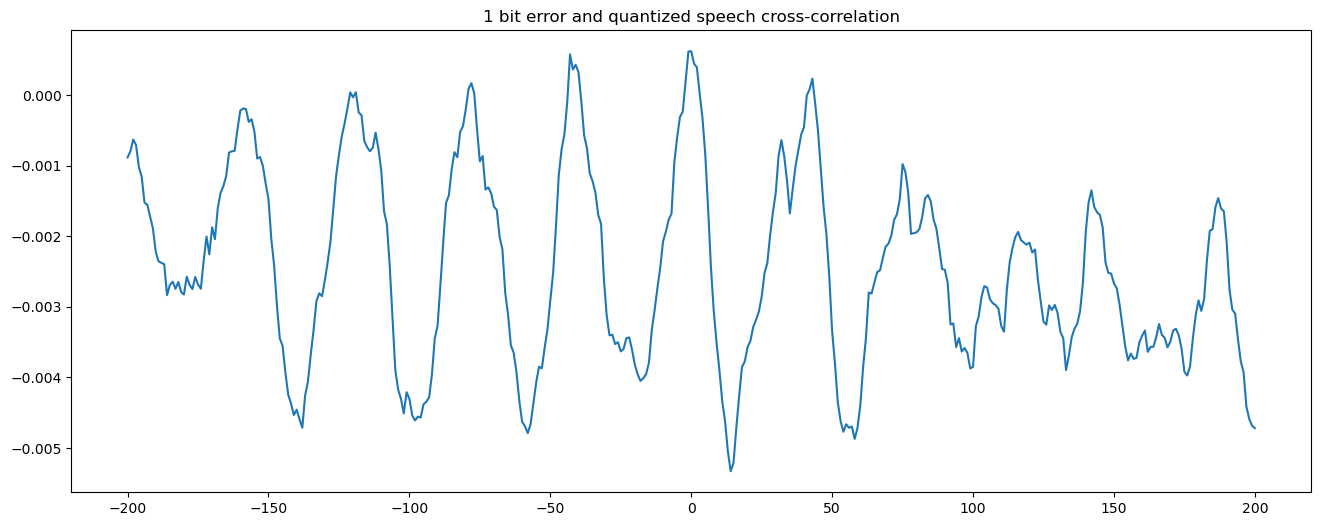

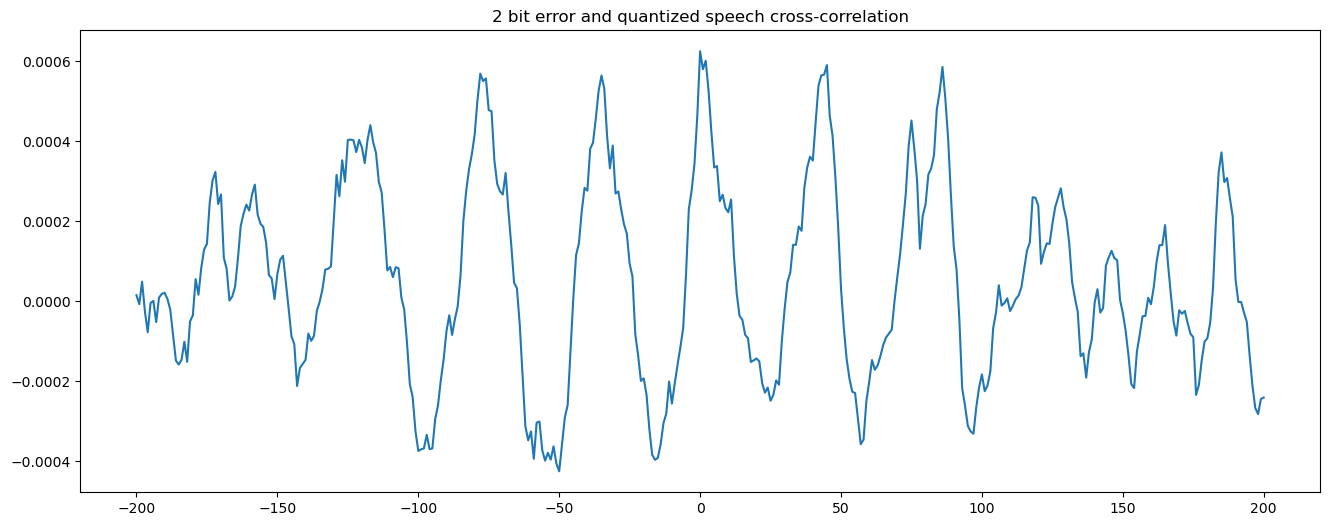

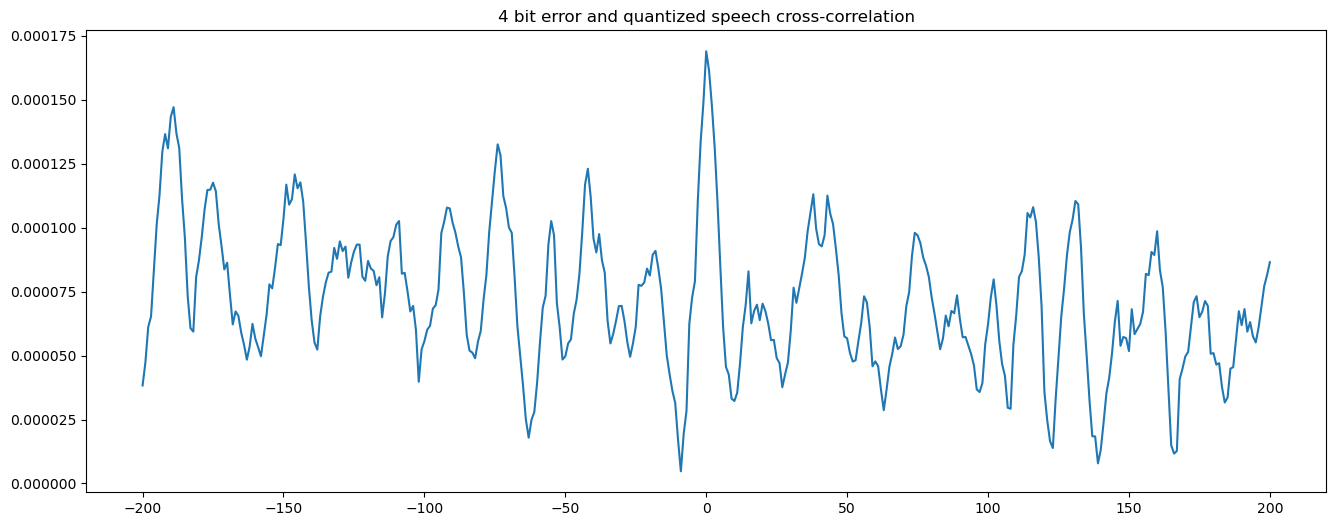

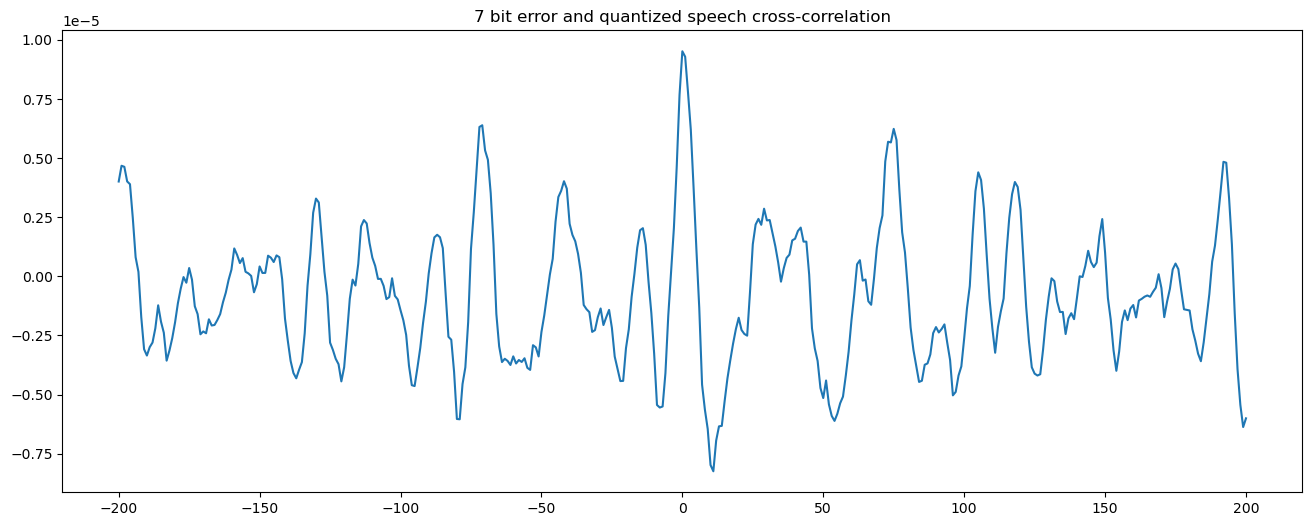

In [14]:
# insert your code here
lags, R = xcorr(Error_1, speech_1, maxlags=200)
plt.plot(lags, R)
plt.title("1 bit error and quantized speech cross-correlation")
plt.show()

lags, R = xcorr(Error_2, speech_2, maxlags=200)
plt.plot(lags, R)
plt.title("2 bit error and quantized speech cross-correlation")
plt.show()

lags, R = xcorr(Error_4, speech_4, maxlags=200)
plt.plot(lags, R)
plt.title("4 bit error and quantized speech cross-correlation")
plt.show()

lags, R = xcorr(Error_7, speech_7, maxlags=200)
plt.plot(lags, R)
plt.title("7 bit error and quantized speech cross-correlation")
plt.show()


**7. Is the autocorrelation influenced by the number of quantization levels? Do samples in the error signal appear to be correlated with each other?**

The autocorrelation appears to be influenced by the number of quantization levels. As the number of quantization levels increases, the error signal is also increasingly correlated with itself.

**8. Does the number of quantization levels influence the cross-correlation?**

The number of quantization levels does not appear to influence the cross-correlation very much.

<h3 style="color:red;"><left>Exercise 3.6: Signal to Noise Ratio</left></h3>

**1. Complete the function below that calculates the power of a sampled signal `x`.**

In [15]:
def get_power(x):
    """
    Parameters
    ---
    x: the input signal
    
    Returns
    ---
    P: the power of the signal
    """

    
    P = np.sum(np.abs(x)**2)
    return P

**2. Compute the PSNR for the four quantized speech signals from the previous section.**

In [18]:
# insert your code here

PSNR_7 = 10 * np.log10(get_power(speech_7) / get_power(Error_7))
PSNR_4 = 10 * np.log10(get_power(speech_4) / get_power(Error_4))
PSNR_2 = 10 * np.log10(get_power(speech_2) / get_power(Error_2))
PSNR_1 = 10 * np.log10(get_power(speech_1) / get_power(Error_1))
print(f"PSNR for 7 bits: {PSNR_7} dB")
print(f"PSNR for 4 bits: {PSNR_4} dB")
print(f"PSNR for 2 bits: {PSNR_2} dB")
print(f"PSNR for 1 bits: {PSNR_1} dB")





PSNR for 7 bits: 31.48957505093058 dB
PSNR for 4 bits: 12.984336607426698 dB
PSNR for 2 bits: 2.649004051478228 dB
PSNR for 1 bits: 1.3282350155287779 dB


**3. Assuming that the speech is sampled at $8$kHz, plot the rate distortion curve using $\frac{1}{\text{PSNR}}$ as the measure of distortion. Generate this curve by computing the PSNR for $7, 6, 5,\dots, 1$ bits/sample. Make sure the axes of the graph are in terms of *distortion* and *bit rate*.**

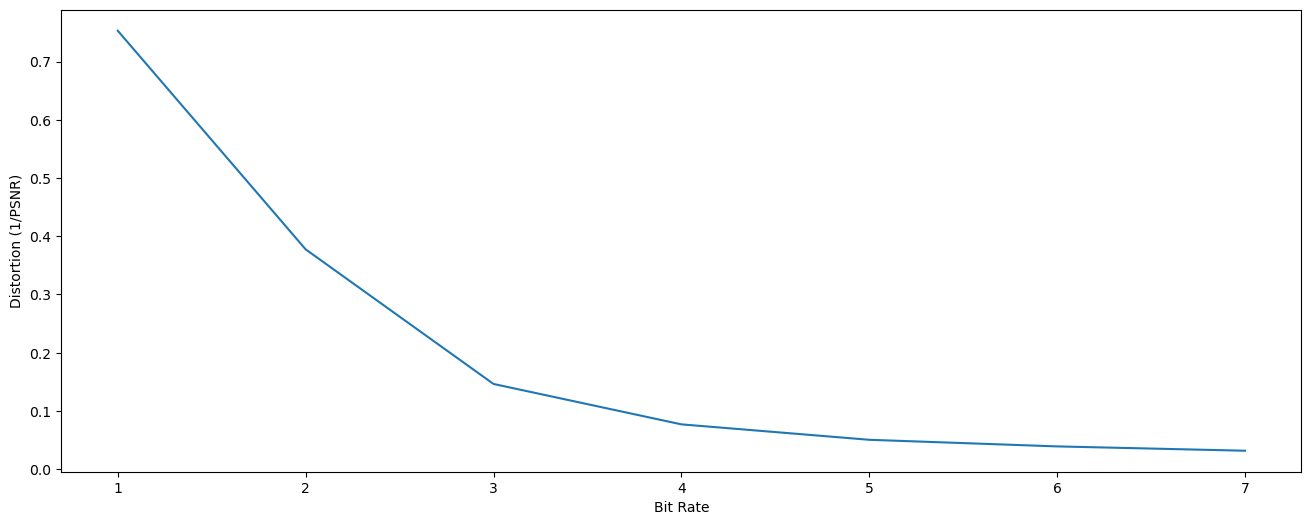

In [19]:
# insert your code here
bit_rates = np.arange(1, 8)
psnr_values =[]

for bits in bit_rates:
    quantized_speech = Uquant(speech, bits)
    error = speech - quantized_speech
    psnr = 10 * np.log10(get_power(quantized_speech) / get_power(error))
    psnr_values.append(psnr)

distortion = 1 / np.array(psnr_values)
plt.plot(bit_rates, distortion)
plt.xlabel('Bit Rate')
plt.ylabel('Distortion (1/PSNR)')
plt.show()


<h3 style="color:red;"><left>Exercise 3.8</left></h3>

**1. First plot a $40$-bin histogram of this speech signal using ```plt.hist(speech, bins=40)```, and make an initial guess of the four optimal quantization levels. Print out the histogram and the initial guess of the quantization levels.**

initial guess: -0.1, -0.025, 0.025, 0.1


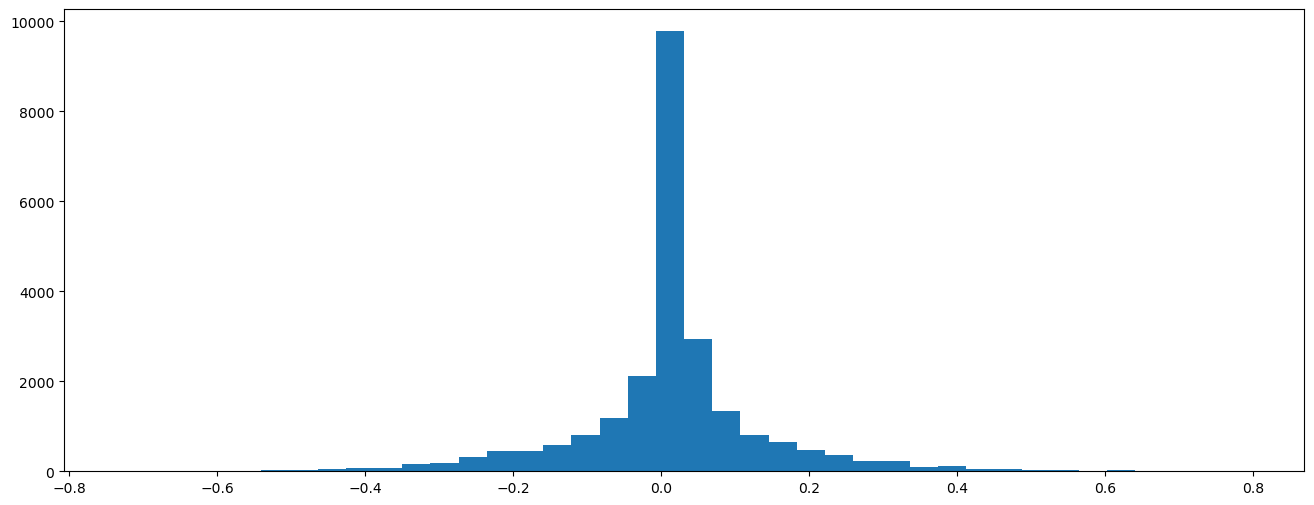

In [21]:
# insert your code here
plt.hist(speech, bins=40)

print("initial guess: -0.1, -0.025, 0.025, 0.1")

**2. Use the function ```lloyds()``` to compute an optimal $4$-level codebook using `speech.au` as the training set.**

In [31]:
# insert your code here

partition, codebook = lloyds(speech, [-0.1, -0.025, 0.025, 0.1])
print("Codebook:", codebook)
print("Partition:", partition)


Codebook: [-0.27381915 -0.08319978  0.02881651  0.26378921]
Partition: [-0.17850946 -0.02719163  0.14630286]


**3. Once the optimal codebook is obtained, use the `codebook` and `partition` vectors to quantize the speech signal.**

* This may be done with a *for* loop and *if* statements.

In [32]:
# insert your code here
quantized = np.zeros_like(speech)

for i, x in enumerate(speech):
    index = np.sum(x > partition)
    quantized[i] = codebook[index]
    


**4. Compute the error signal and PSNR.**

In [34]:
# insert your code here
error_lloyd = speech - quantized
PSNR_lloyd = 10 * np.log10(get_power(quantized) / get_power(error_lloyd))
print(f"PSNR: {PSNR_lloyd} dB")



PSNR: 6.624936266280167 dB


**5. Plot the histogram in Q1 again. However, on this histogram plot, also mark where the optimal quantization levels fall along the $x$-axis.**

* To draw a vertical line, use `plt.axvline(x=0.8, color='r')` to plot a vertical line $x=0.8$ of red color.

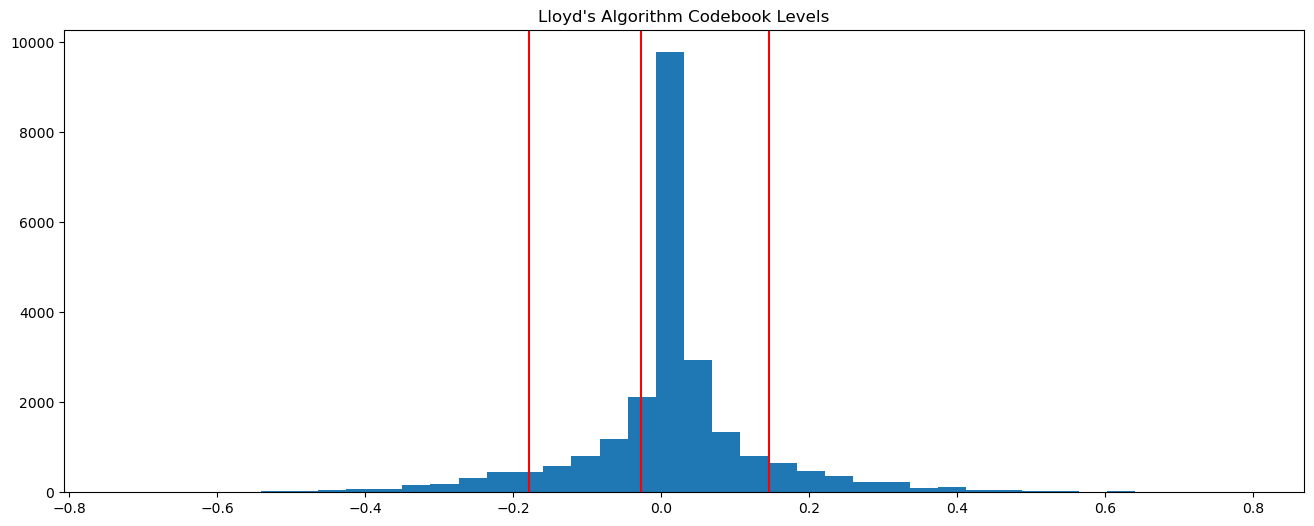

In [37]:
# insert your code here
plt.hist(speech, bins=40)
plt.axvline(x=-0.17850946, color='r')
plt.axvline(x=-0.02719163, color='r')
plt.axvline(x=0.14630286, color='r')
plt.title("Lloyd's Algorithm Codebook Levels")
plt.show()


**6. Play the quantized audio, and compare the sound quality of the uniform- and max-quantized signals.**

In [39]:
# insert your code here
display(ipd.Audio(quantized, rate=fs))
display(ipd.Audio(speech_2, rate=fs))

print("sound quality of max-quantized signal is better.")




sound quality of max-quantized signal is better.


**7. If the speech signal was uniformly distributed, would the two quantizers be the same? Explain your answer.**

Yes, if the speech signal was uniformly distributed, then the two quantizers should be the same. The goal of Lloyd's algorithm is to reduce the error in quantization, by choosing centroids in the data. However, with uniform data, those centroids don't exist.